In [48]:
import os, sys
import glob
import json
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_fscore_support, f1_score

module_path = os.path.abspath("..")
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from dataset_utils.Dataset import Dataset
from dataset_utils.DataInitiator import OmniDataInitiator
from dataset_utils.config import DS_ROOT

print(matplotlib.__version__)

1.4.3


In [28]:
result_dir = "../train/result/"

In [54]:
def fscore(result):
     return f1_score(result['t'], result['y'])

def calculate_total_score(path):
    with open(path, "r") as fr:
        result_all = json.load(fr)
    y_all = np.array([], np.int32)
    t_all = np.array([], np.int32)
    for id in sorted([int(id) for id in result_all.keys()]):
        result = result_all["%d" % id]
        y_all = np.hstack((y_all, np.array(result['test']['y'])))
        t_all = np.hstack((t_all, np.array(result['test']['t'])))
    fscore = precision_recall_fscore_support(t_all, y_all)[2]
    recall = recall_score(t_all, y_all)
    precision = precision_score(t_all, y_all)
    return fscore, recall, precision

def extract_pids_and_scores(path):
    with open(path, "r") as fr:
        result = json.load(fr)
    pids = sorted(result.keys(), key=lambda s: int(s))
    scores = [fscore(result[pid]['test']) for pid in sorted(result.keys(), key=lambda s: int(s))]
    return pids, scores

def extract_pids_and_recall_precision(path):
    with open(path, "r") as fr:
        result = json.load(fr)
    pids = sorted(result.keys(), key=lambda s: int(s))
    recalls = [result[pid]['test']['recall'] for pid in sorted(result.keys(), key=lambda s: int(s))]
    precisions = [result[pid]['test']['precision'] for pid in sorted(result.keys(), key=lambda s: int(s))]
    return pids, recalls, precisions
    
def display_score(pids, scores, title=None):
    assert len(pids) == len(scores)
    N = len(pids)
    width = 0.7
    x = np.arange(N)
    fig, ax = plt.subplots(figsize=(15, 5)) # Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成

    rects = ax.bar(x, scores, width, color='g')
    ax.set_xticks(x+width/2.)
    ax.set_xticklabels(pids)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("person id")
    ax.set_ylabel("fscore")
    ax.set_title(title)

    def attach_scores(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%.2f' % height,
                    ha='center', va='bottom')

    attach_scores(rects)
    plt.show()
    
def display_score_double_bar(pids, scores1, scores2, title=None):
    assert len(pids) == len(scores)
    N = len(pids)
    width = 0.3
    x = np.arange(N)
    fig, ax = plt.subplots(figsize=(15, 5)) # Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成

    rects1 = ax.bar(x, scores1, width, color='blue')
    rects2 = ax.bar(x+width, scores2, width, color='green')
    ax.set_xticks(x+width/2.)
    ax.set_xticklabels(pids)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("person id")
    ax.set_ylabel("fscore")
    ax.set_title(title)

    def attach_scores(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%.2f' % height,
                    ha='center', va='bottom')

    attach_scores(rects1)
    attach_scores(rects2)
    plt.show()
    
def display_score_with_size(pids, scores, sizes, title=None, xlabel="person id", ylabel="fscore"):
    assert len(pids) == len(scores)
    N = len(pids)
    width = 0.7
    x = np.arange(N)
    fig, ax = plt.subplots(figsize=(15, 5)) # Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成

    rects = ax.bar(x, scores, width, color='g')
    ax.set_xticks(x+width/2.)
    ax.set_xticklabels(pids)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    def attach_scores(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%.2f' % height,
                    ha='center', va='bottom')
            
    def attach_sizes(rects, sizes):
        # attach some text labels
        for rect, size in zip(rects, sizes):
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 0.5*height, '%d' % size,
                    ha='center', va='bottom')
    attach_scores(rects)
    attach_sizes(rects, sizes)
    plt.show()
    
    
def analyze(conf_name):
    result_path = os.path.join(result_dir, conf_name, "all.json")
    pids, scores = extract_pids_and_scores(result_path)
    pids, recalls, precisions = extract_pids_and_recall_precision(result_path)
    fscores, recall, precision = calculate_total_score(result_path)
    print("total recall: %s" % recall)
    print("total precision: %s" % precision)
    print("total fscore: %s" % fscores[1])
    display_score(pids, scores, title="fscore for each person")

## 人ごとの精度

## default

total recall: 0.6790450928381963
total precision: 0.7491638795986622
total fscore: 0.712383224011131


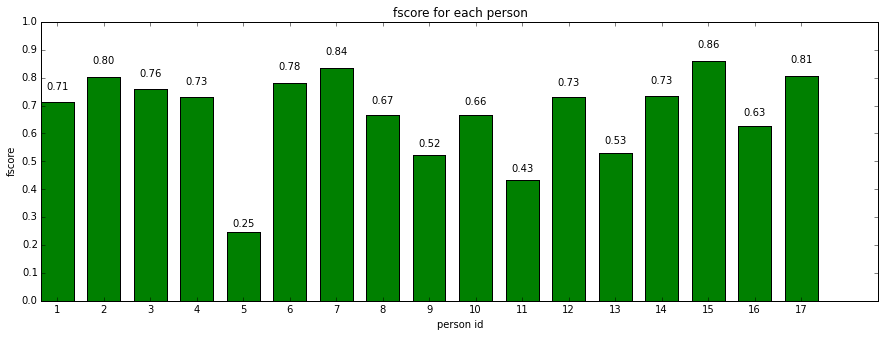

total recall: 0.729064039408867
total precision: 0.790468364831553
total fscore: 0.7585255273013994


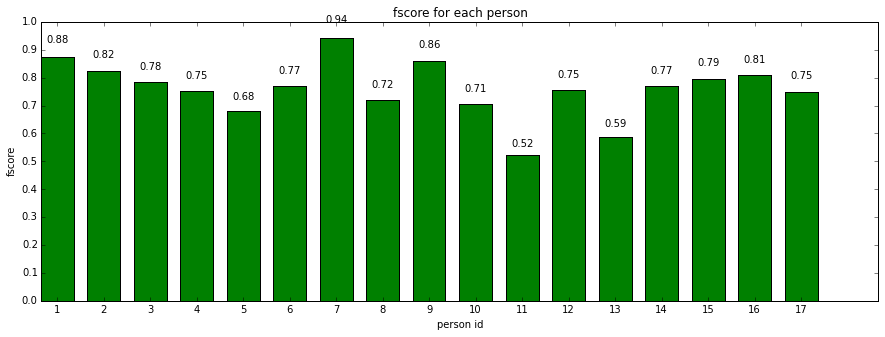

total recall: 0.7317165593027662
total precision: 0.7702433187076186
total fscore: 0.7504858142246404


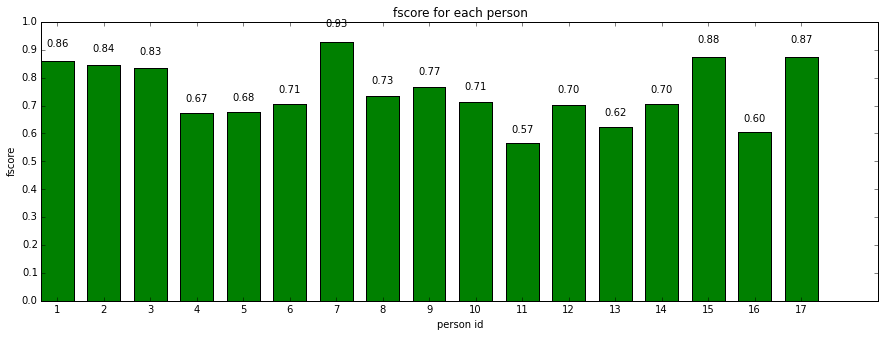

In [56]:
analyze("default1")
analyze("default2")
analyze("default3")

## decrease_noise

total recall: 0.7069963177275118
total precision: 0.7666856816885339
total fscore: 0.735632183908046


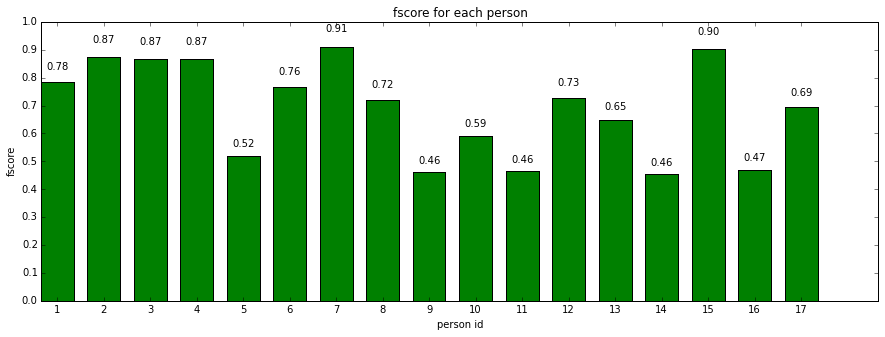

total recall: 0.7322461862177801
total precision: 0.8083623693379791
total fscore: 0.7684239580458183


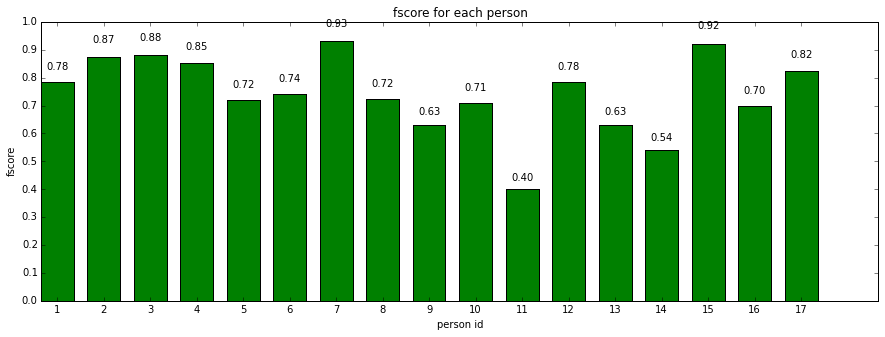

total recall: 0.6922672277748554
total precision: 0.770040959625512
total fscore: 0.7290858725761774


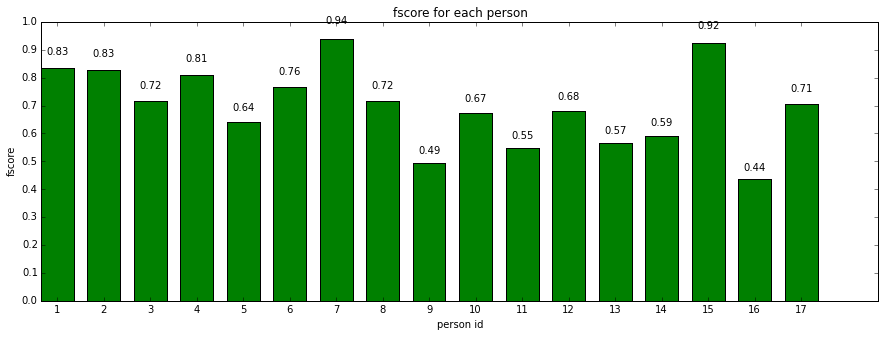

In [80]:
analyze("decrease_noise1")
analyze("decrease_noise2")
analyze("decrease_noise3")

## face_feature

total recall: 0.7943187795896897
total precision: 0.8070550507749866
total fscore: 0.8006362672322375


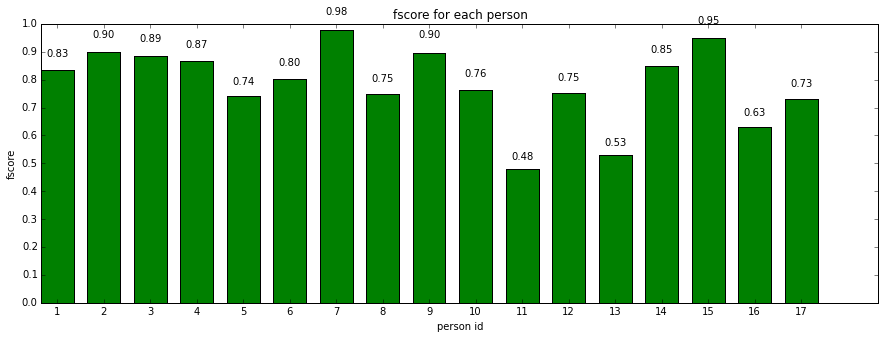

total recall: 0.7869542346133613
total precision: 0.7828362114076399
total fscore: 0.7848898216159496


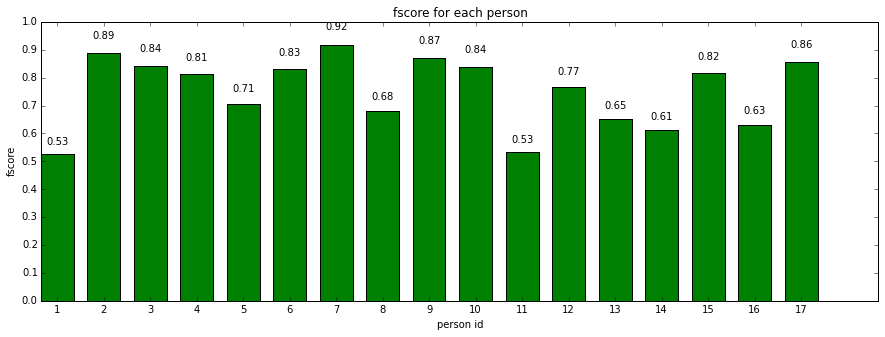

total recall: 0.7764334560757497
total precision: 0.7961165048543689
total fscore: 0.7861517976031958


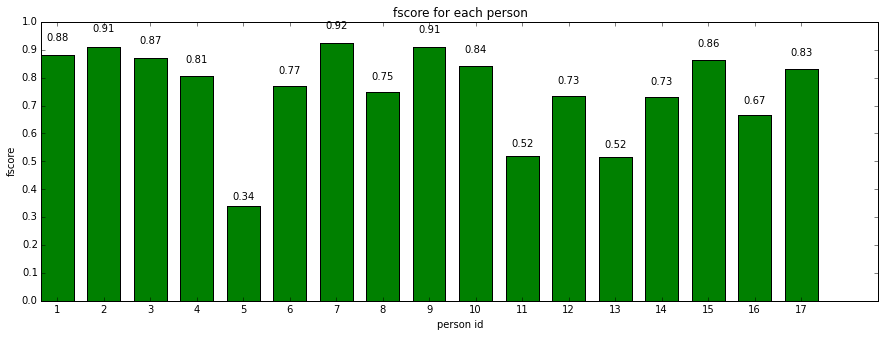

In [59]:
analyze("with_face_feature_v1_00")
analyze("with_face_feature_v1_01")
analyze("with_face_feature_v1_02")

total recall: 0.7569700157811678
total precision: 0.7854803493449781
total fscore: 0.7709616930083044


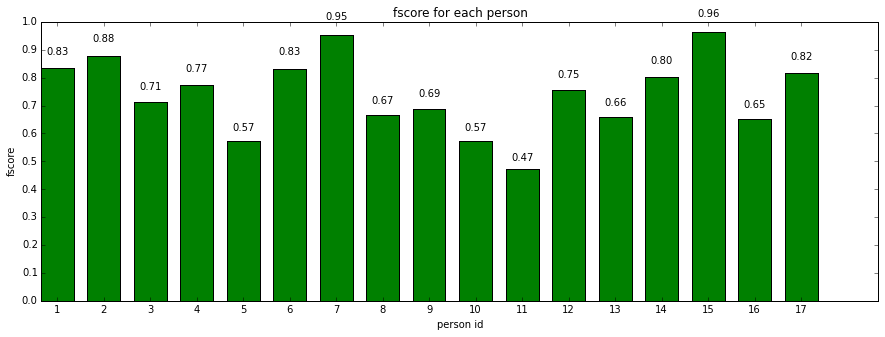

total recall: 0.7143608627038401
total precision: 0.771152754116979
total fscore: 0.7416712179137085


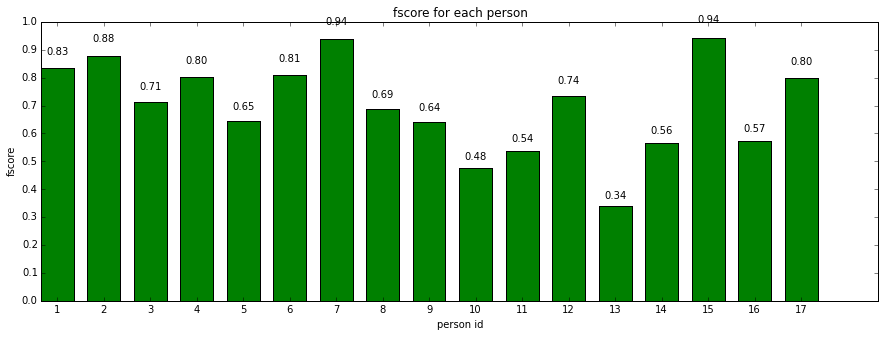

total recall: 0.7638085218306154
total precision: 0.7610062893081762
total fscore: 0.7624048306642163


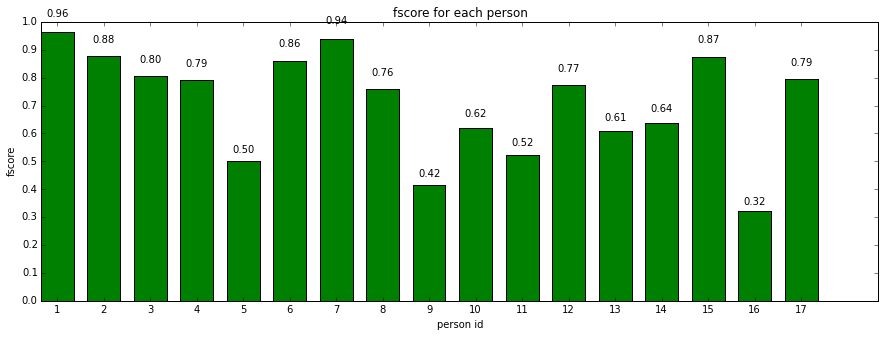

In [61]:
analyze("with_face_feature_v2_00")
analyze("with_face_feature_v2_01")
analyze("with_face_feature_v2_02")

total recall: 0.7201472908995266
total precision: 0.8139120095124851
total fscore: 0.7641641082891432


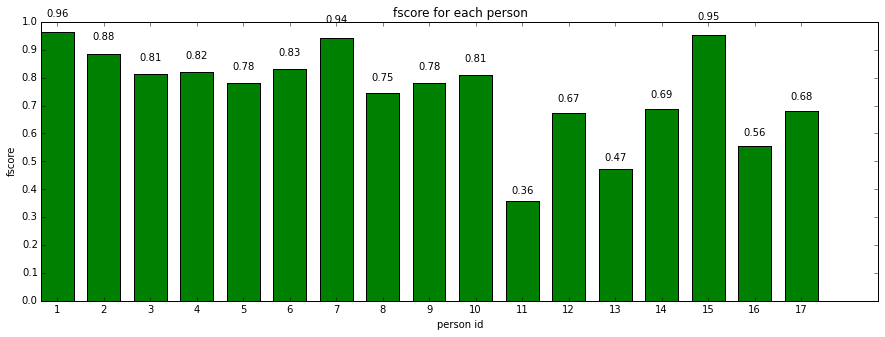

total recall: 0.7885323513940031
total precision: 0.751002004008016
total fscore: 0.7693097254298177


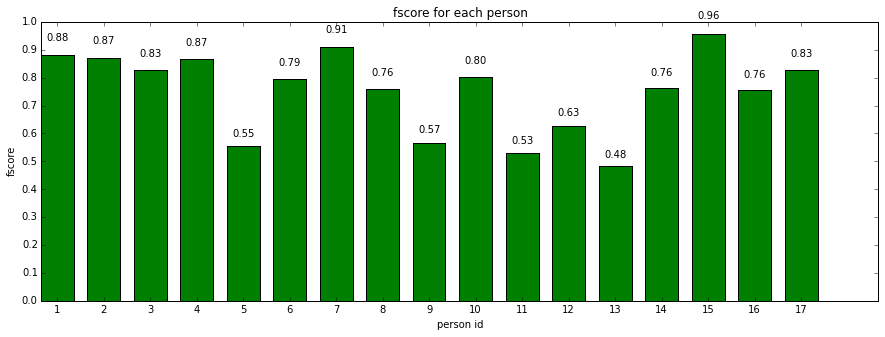

total recall: 0.7269857969489742
total precision: 0.7614325068870523
total fscore: 0.7438105489773951


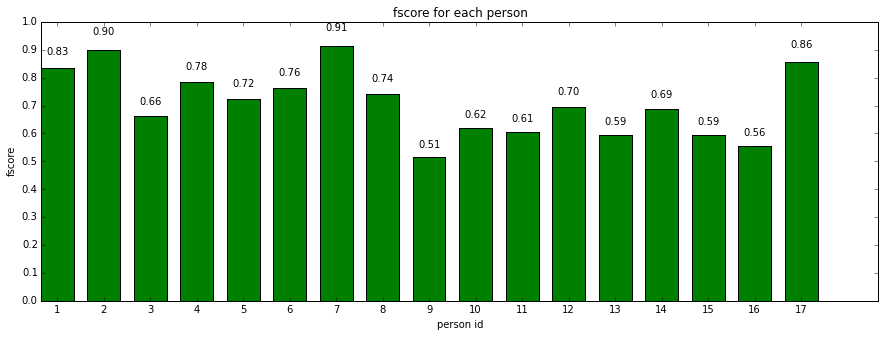

In [62]:
analyze("with_face_feature_v3_00")
analyze("with_face_feature_v3_01")
analyze("with_face_feature_v3_02")

## 場所情報あり

total recall: 0.8006312467122567
total precision: 0.806998939554613
total fscore: 0.8038024821758648


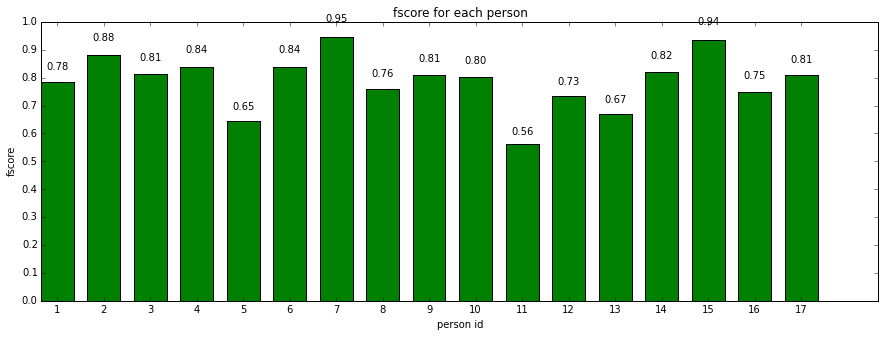

total recall: 0.766964755391899
total precision: 0.7641509433962265
total fscore: 0.7655552638487793


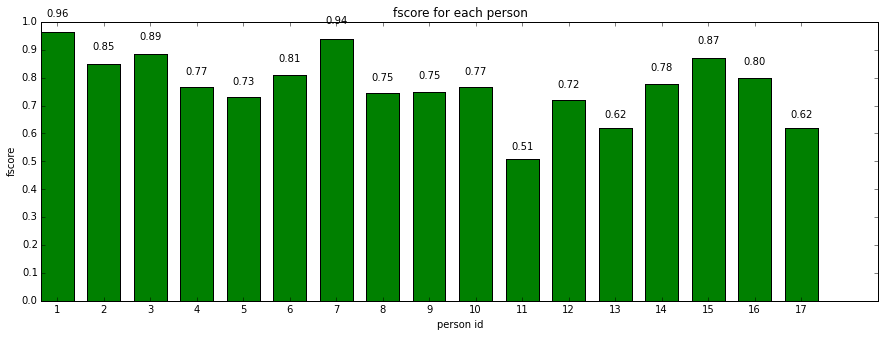

total recall: 0.7643345607574961
total precision: 0.8090200445434298
total fscore: 0.7860427373546118


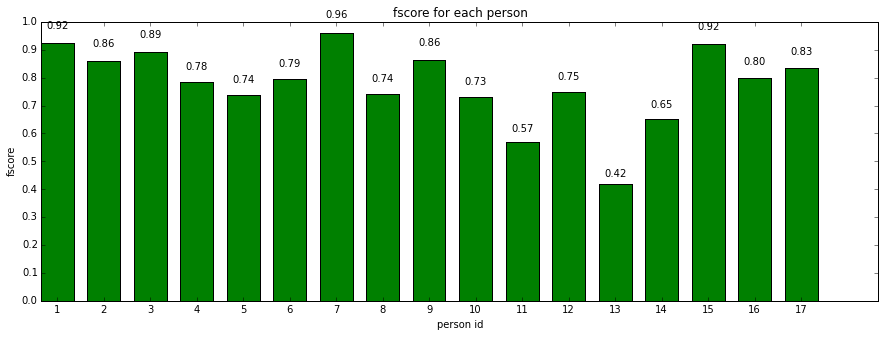

In [72]:
analyze("with_face_feature_and_place_00")
analyze("with_face_feature_and_place_01") 
analyze("with_face_feature_and_place_02")

## each_eye

total recall: 0.6749079431877959
total precision: 0.7084483710657096
total fscore: 0.6912715517241379


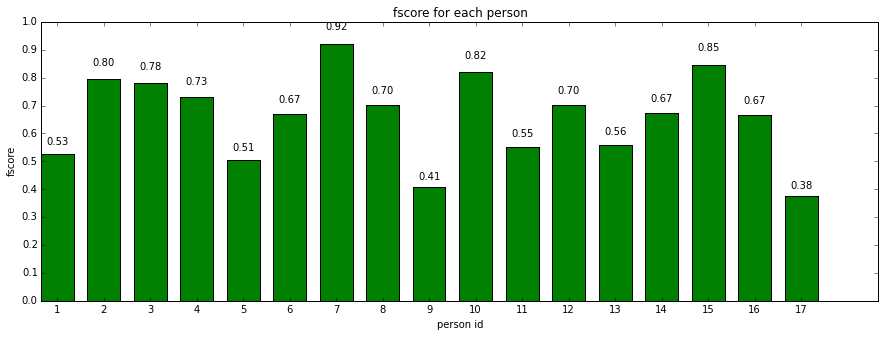

total recall: 0.6270384008416623
total precision: 0.7189384800965019
total fscore: 0.6698510817645407


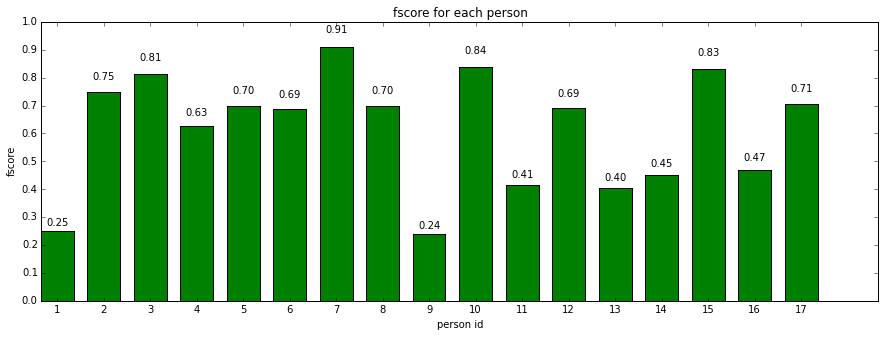

total recall: 0.6032588101553619
total precision: 0.6694701429772918
total fscore: 0.6346422164640224


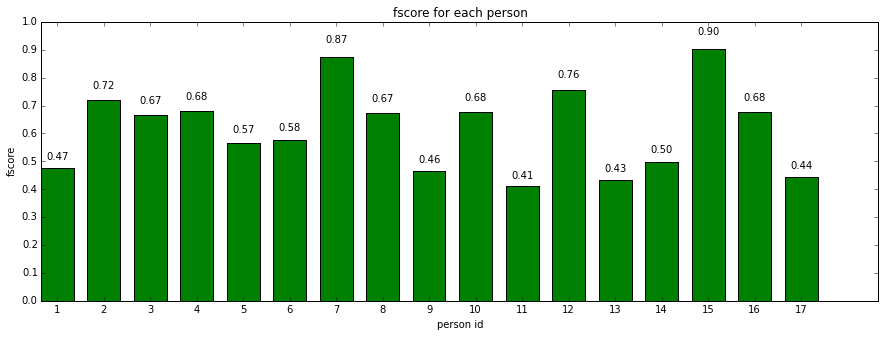

In [63]:
analyze("each_eye_v1_00")
analyze("each_eye_v2_00")
analyze("each_eye_v3_00")

## all_target

total recall: 0.6149395055234087
total precision: 0.6615732880588568
total fscore: 0.6374045801526718


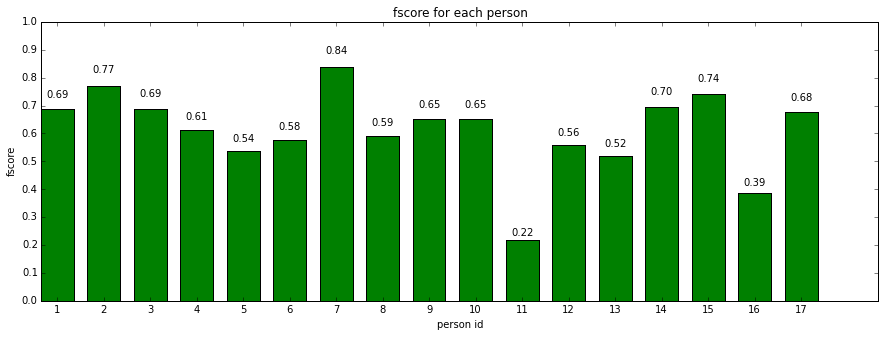

In [68]:
analyze("all_target_with_face_feature")

## attention

total recall: 0.6286165176223041
total precision: 0.6852064220183486
total fscore: 0.6556927297668038


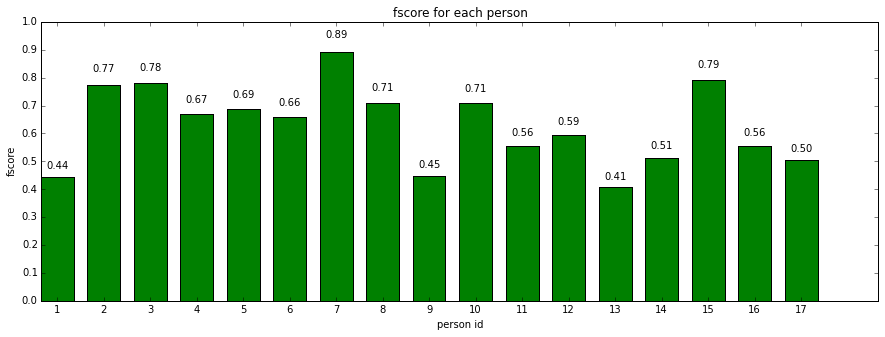

In [70]:
analyze("attention01")

total recall: 0.21599090564607806
total precision: 0.800561797752809
total fscore: 0.3401969561324978


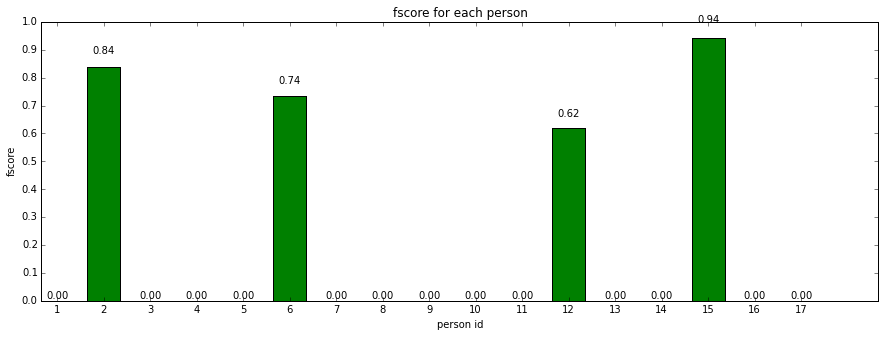

total recall: 0.3020083364910951
total precision: 0.7859960552268245
total fscore: 0.4363536819052833


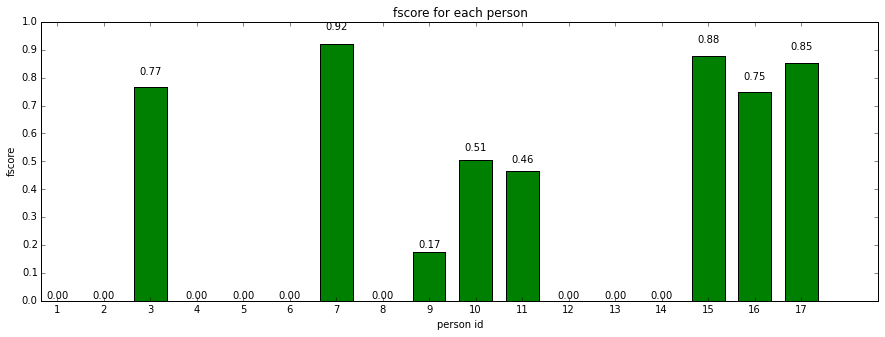

total recall: 0.15536187949981053
total precision: 0.7032590051457976
total fscore: 0.25450031036623216


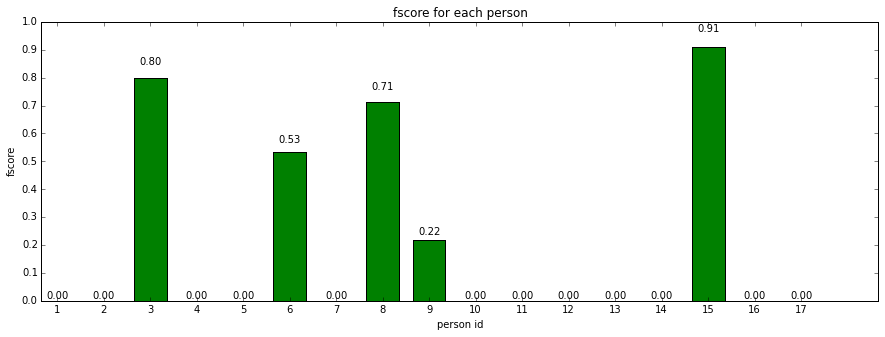

In [77]:
analyze("spatial_weights_v1_00")
analyze("spatial_weights_v2_00")
analyze("spatial_weights_v4_00")

## sw vs. normal


total recall: 0.8511309836927933
total precision: 0.7704761904761904
total fscore: 0.8087978005498625
total recall: 0.3808260704812429
total precision: 0.8078778135048231
total fscore: 0.5176409992274015


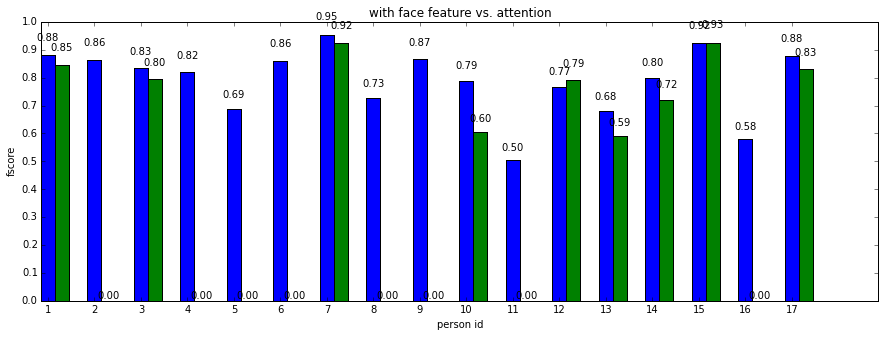

In [23]:
result_path = os.path.join(result_dir, "with_face_feature2", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores1 = scores

result_path = os.path.join(result_dir, "spatial_weights_many_02", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores2 = scores

display_score_double_bar(pids, scores1, scores2, title="with face feature vs. attention")

total recall: 0.634331186055324
total precision: 0.6239284383153186
total fscore: 0.6290868094701241


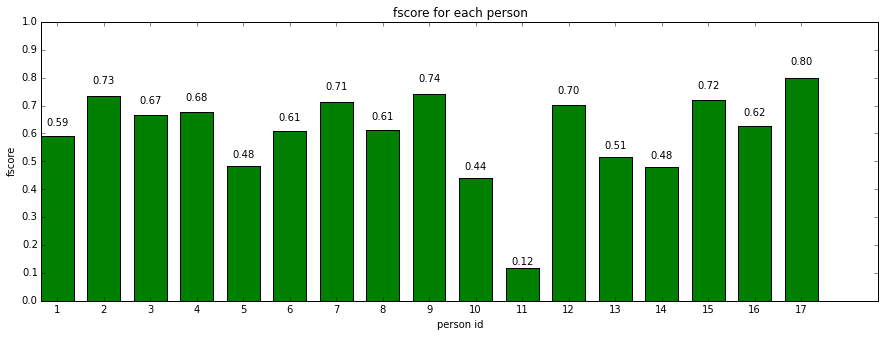

In [286]:
result_path = os.path.join(result_dir, "fine_grained_00", "all.json")
pids, scores = extract_pids_and_scores(result_path)
pids, recalls, precisions = extract_pids_and_recall_precision(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
display_score(pids, scores, title="fscore for each person")

## 顔向き特徴の有無

total recall: 0.7322461862177801
total precision: 0.8083623693379791
total fscore: 0.7684239580458183
total recall: 0.8511309836927933
total precision: 0.7704761904761904
total fscore: 0.8087978005498625


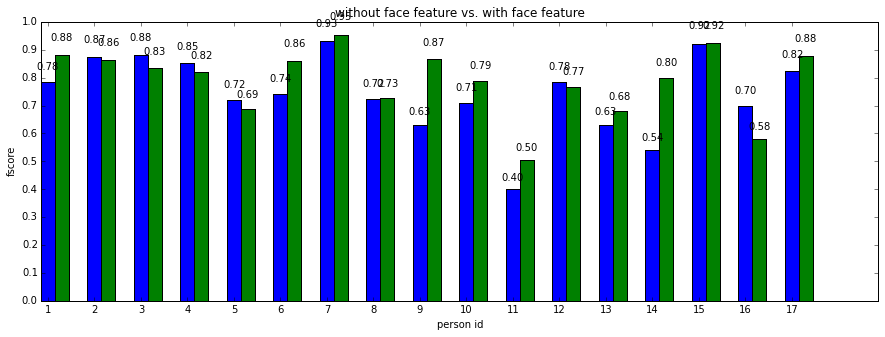

In [257]:
result_path = os.path.join(result_dir, "decrease_noise2", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores1 = scores

result_path = os.path.join(result_dir, "with_face_feature2", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores2 = scores

display_score_double_bar(pids, scores1, scores2, title="without face feature vs. with face feature")

## ノイズ除去なし vs. あり

total recall: 0.6998863205759758
total precision: 0.7538775510204082
total fscore: 0.7258793476124977
total recall: 0.7322461862177801
total precision: 0.8083623693379791
total fscore: 0.7684239580458183


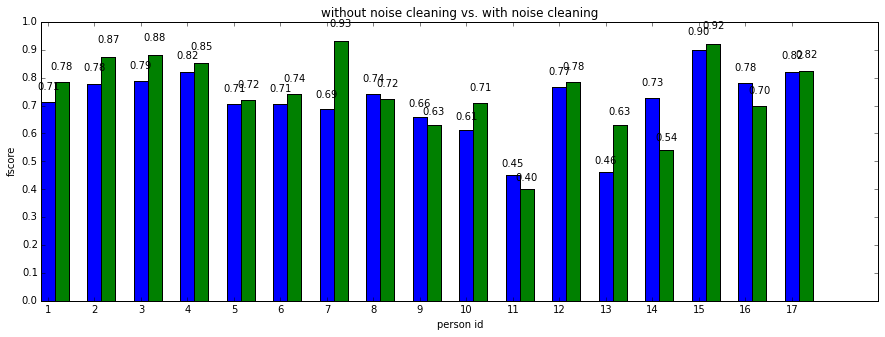

In [259]:
result_path = os.path.join(result_dir, "default", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores1 = scores

result_path = os.path.join(result_dir, "decrease_noise2", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores2 = scores

display_score_double_bar(pids, scores1, scores2, title="without noise cleaning vs. with noise cleaning")

# 場所別精度

In [36]:
data_initiator = OmniDataInitiator()
def extract_pids_and_scores_by_places(path, places):
    with open(path, "r") as fr:
        result = json.load(fr)
    pids = sorted(result.keys(), key=lambda s: int(s))
    scores = []
    y_all = np.array([])
    t_all = np.array([])
    for pid in pids:
        paths = result[pid]['test']['paths']
        index = [i for (i, path) in enumerate(paths) if data_initiator.init(path).place in places]
        y = np.array(result[pid]['test']['y'])[index]
        t = np.array(result[pid]['test']['t'])[index]
        y_all = np.hstack((y_all, y))
        t_all = np.hstack((t_all, t))
        fscore = precision_recall_fscore_support(t, y)[2]
        fscore = fscore[1] if len(fscore) >= 2 else 0
        scores.append(fscore)
    fscores_all = precision_recall_fscore_support(t_all, y_all)[2]
    recall_all = recall_score(t_all, y_all)
    precision_all = precision_score(t_all, y_all)
    return pids, scores, recall_all, precision_all,  fscores_all

## ABCDで学習

### 席A, B (近い席) vs. 席C, D (遠い席)

total recall: 0.6949846468781986
total precision: 0.7733485193621867
total fscore: 0.7320754716981132
total recall: 0.7532467532467533
total precision: 0.7016129032258065
total fscore: 0.7265135699373695


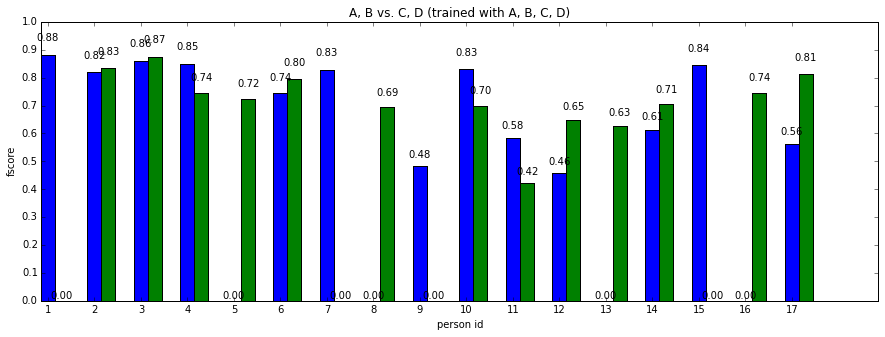

In [222]:
result_path = os.path.join(result_dir, "with_face_feature", "all.json")
pids, scores, recall, precision, fscores = extract_pids_and_scores_by_places(result_path, {"A", "B"})
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores1 = scores

pids, scores, recall, precision, fscores = extract_pids_and_scores_by_places(result_path, {"C", "D"})
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores2 = scores

display_score_double_bar(pids, scores1, scores2, title="A, B vs. C, D (trained with A, B, C, D)")

In [ ]:
result_path = os.path.join(result_dir, "without_noise_detail", "all.json")
pids, scores = extract_pids_and_scores_by_places(result_path, {"A", "B"})
display_score(pids, scores, "without_noise_detail fscore only AB")

pids, scores = extract_pids_and_scores_by_places(result_path, {"C", "D"})
display_score(pids, scores, "without_noise_detail fscore only CD")

result_path = os.path.join(result_dir, "placeAB_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
display_score(pids, scores, "placeAB_detail fscore")
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])

result_path = os.path.join(result_dir, "placeCD_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
display_score(pids, scores, "placeCD_detail fscore")
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])

## 注視点ごとの精度分析

In [15]:
def analyze_score_for_each_target(path, pids={}, places={}, title=""):
    target2result = {}
    with open(path, "r") as fr:
        result = json.load(fr)
        
    for pid in result.keys():
        if pids and pid not in pids:
            continue

        for i, path in enumerate(result[pid]["test"]["paths"]):
            target = int(path.split("_")[3])
            place = path.split("_")[2]
            if places and place not in places:
                continue
            if target not in target2result:
                target2result[target] = {"t":[], "y":[]}
            target2result[target]["t"].append(result[pid]["test"]["t"][i])
            target2result[target]["y"].append(result[pid]["test"]["y"][i])
    
    targets = []
    scores = []
    sizes = []
    for target, r in sorted(target2result.items()):
        accuracy = accuracy_score(r["t"], r["y"])
        target2result[target]["fscore"] = accuracy
        targets.append(target)
        scores.append(accuracy)
        sizes.append(len(r["t"]))
    display_score_with_size(targets, scores, sizes, xlabel="target", ylabel="accuracy", title=title)

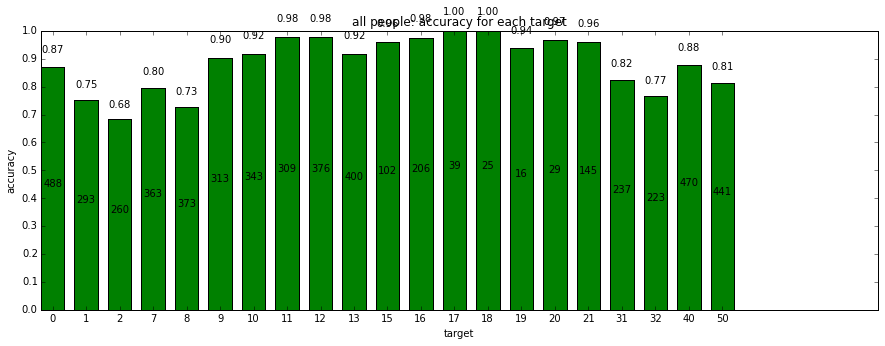

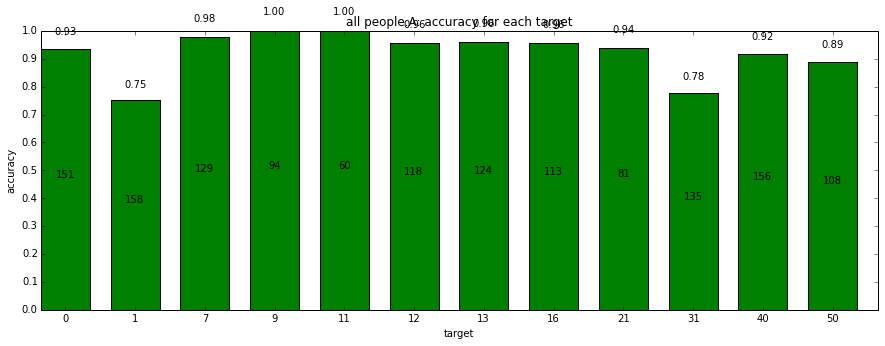

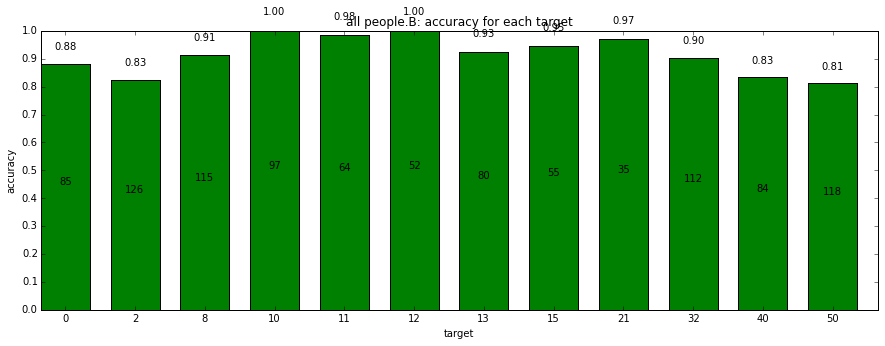

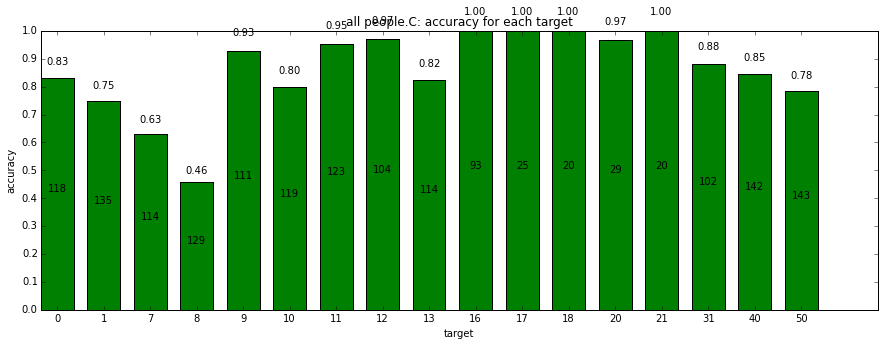

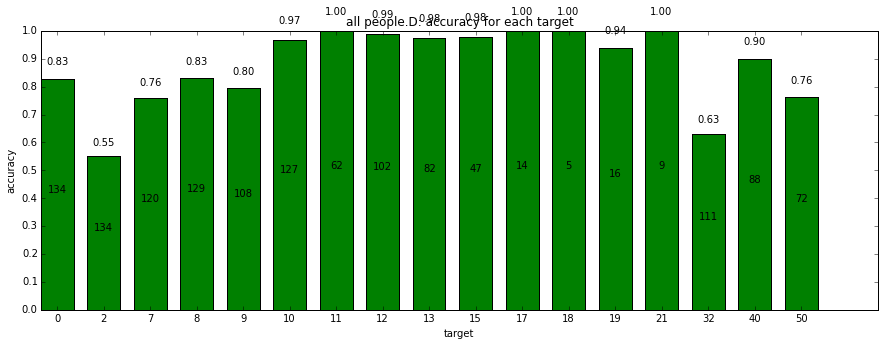

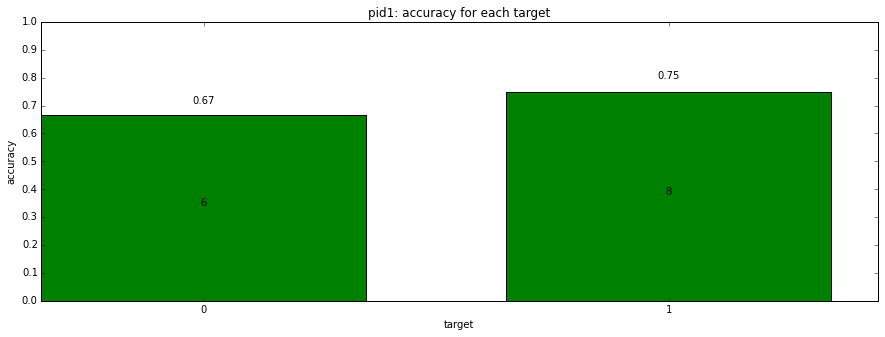

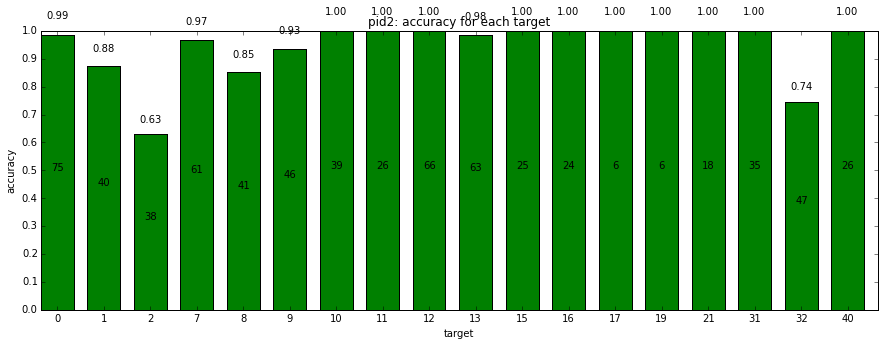

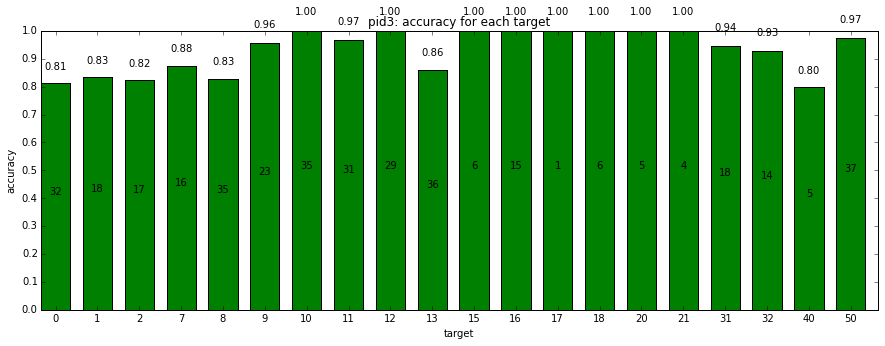

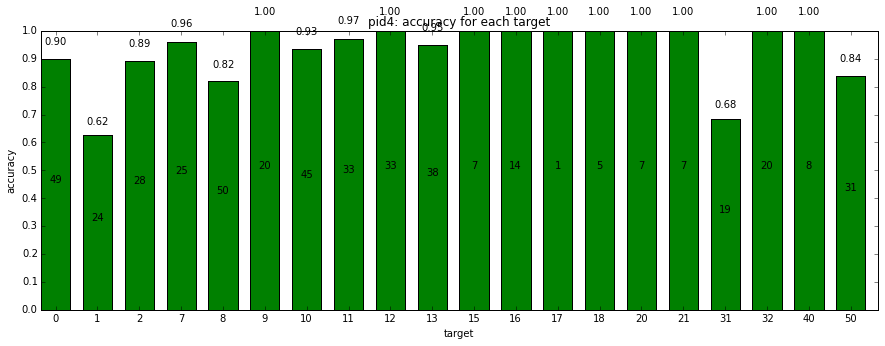

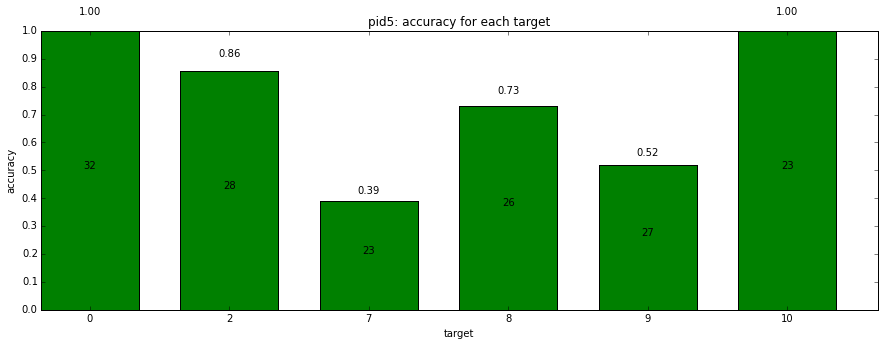

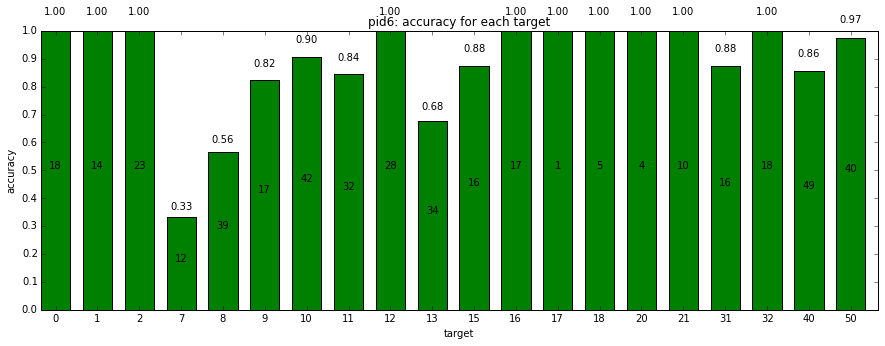

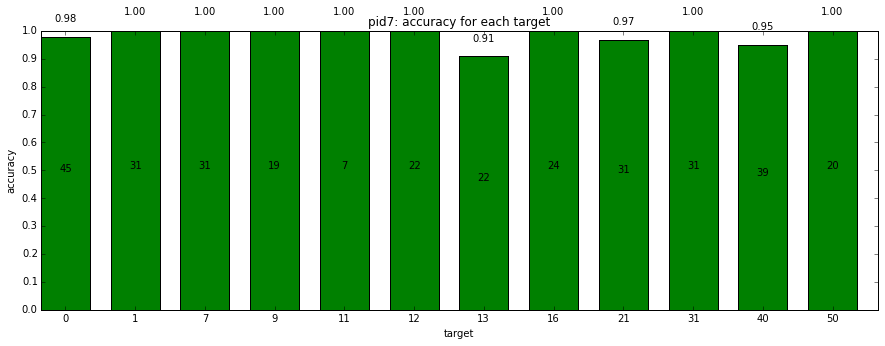

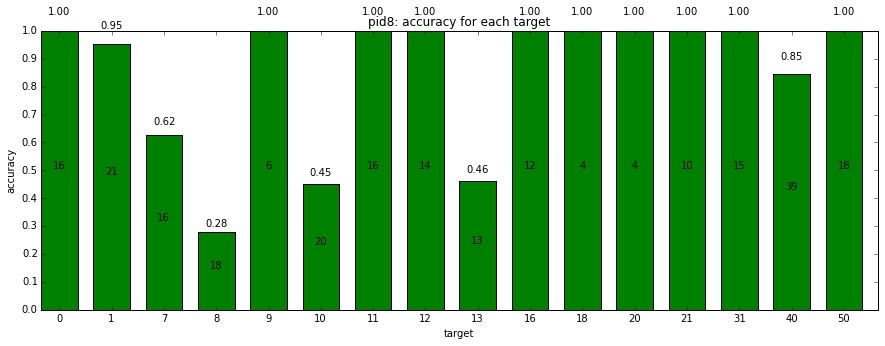

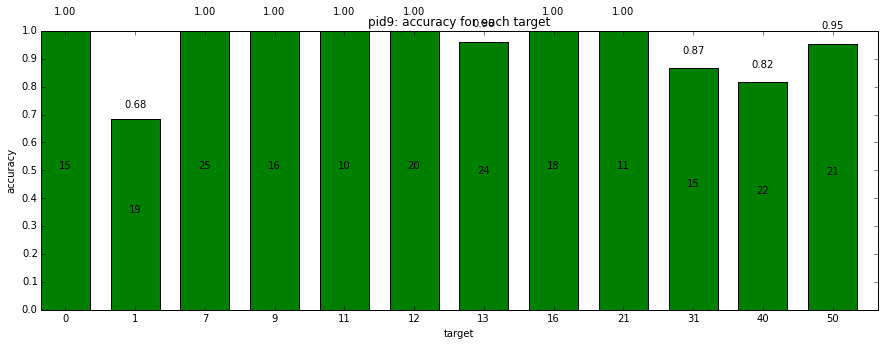

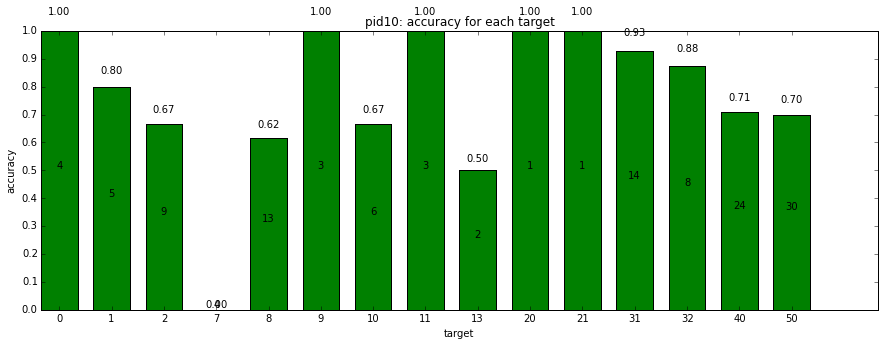

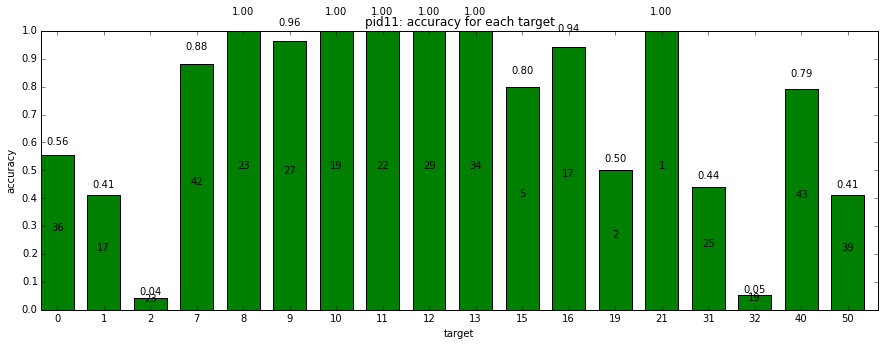

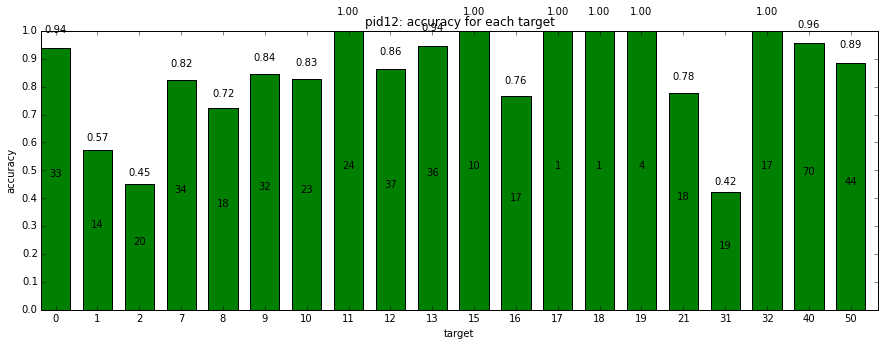

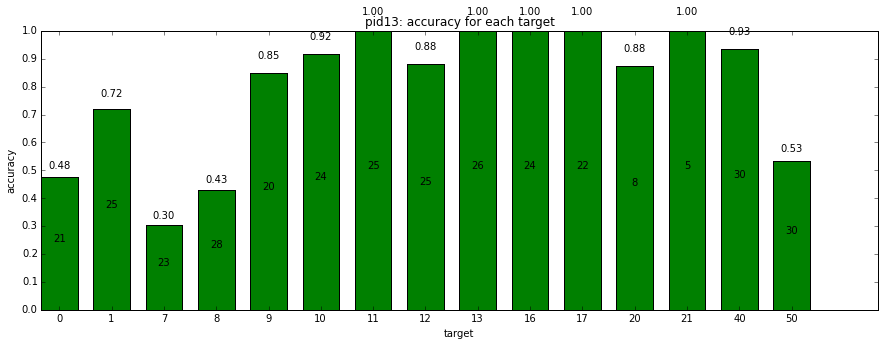

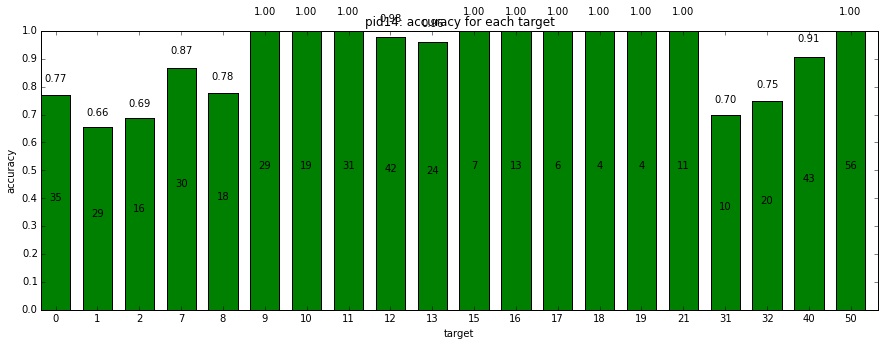

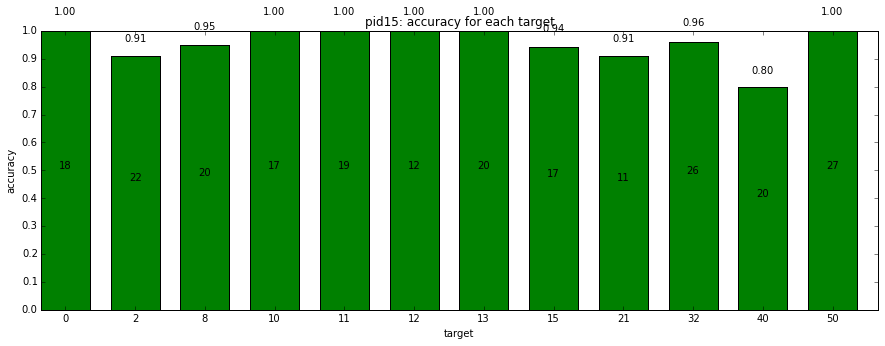

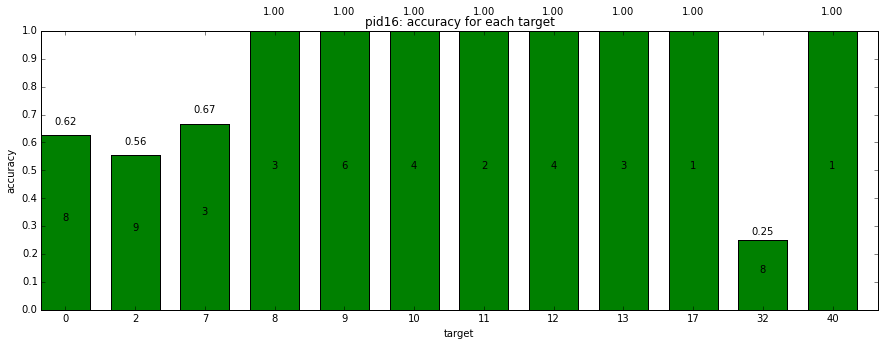

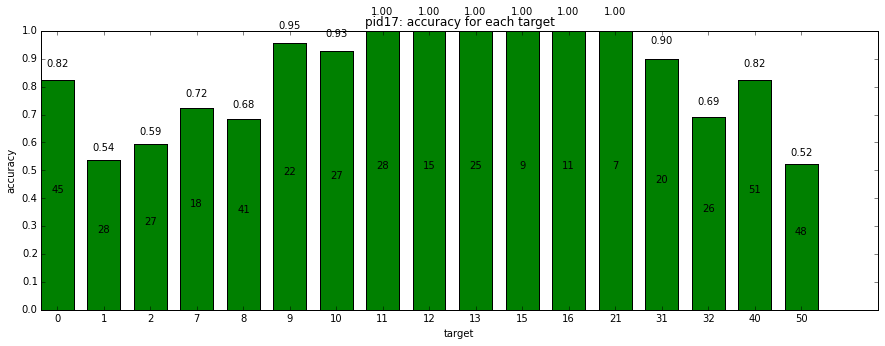

In [79]:
setting = "with_face_feature_v1_00"
analyze_score_for_each_target(os.path.join(result_dir, setting, "all.json"), title="all people: accuracy for each target")
analyze_score_for_each_target(os.path.join(result_dir, setting, "all.json"), places={"A"}, title="all people.A: accuracy for each target")
analyze_score_for_each_target(os.path.join(result_dir, setting, "all.json"), places={"B"}, title="all people.B: accuracy for each target")
analyze_score_for_each_target(os.path.join(result_dir, setting, "all.json"), places={"C"}, title="all people.C: accuracy for each target")
analyze_score_for_each_target(os.path.join(result_dir, setting, "all.json"), places={"D"}, title="all people.D: accuracy for each target")

for i in range(1, 18):
    analyze_score_for_each_target(os.path.join(result_dir, setting, "all.json"), pids={"%d" % i}, places={"A","B", "C", "D"}, title="pid%d: accuracy for each target" % i)
